
- Student name: Nadine Amersi-Belton
- Student pace: Part-time 
- Scheduled project review date/time: TBC
- Instructor name: TBC
- Blog post URL: TBC

# Predicting House Prices in King County

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Our-Approach" data-toc-modified-id="Our-Approach-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our Approach</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Investigate-Data-Types" data-toc-modified-id="Investigate-Data-Types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Investigate Data Types</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Check-duplicates" data-toc-modified-id="Check-duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check duplicates</a></span></li><li><span><a href="#Initial-feature-engineering" data-toc-modified-id="Initial-feature-engineering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Initial feature engineering</a></span></li><li><span><a href="#Outlier-considerations" data-toc-modified-id="Outlier-considerations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Outlier considerations</a></span></li></ul></li><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore data</a></span><ul class="toc-item"><li><span><a href="#Initial-visualisations" data-toc-modified-id="Initial-visualisations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial visualisations</a></span></li><li><span><a href="#Q1:-Best-time-of-year-to-sell" data-toc-modified-id="Q1:-Best-time-of-year-to-sell-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Q1: Best time of year to sell</a></span></li><li><span><a href="#Q2:-Best-location/neighbourhood" data-toc-modified-id="Q2:-Best-location/neighbourhood-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Q2: Best location/neighbourhood</a></span></li><li><span><a href="#Q3:-What-type-of-houses-are-most-valuable" data-toc-modified-id="Q3:-What-type-of-houses-are-most-valuable-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Q3: What type of houses are most valuable</a></span></li><li><span><a href="#Investigate-continuous-variables" data-toc-modified-id="Investigate-continuous-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Investigate continuous variables</a></span></li></ul></li></ul></div>

## Introduction

### Problem Statement

In April 2020, estate agent ABC commisions a research project investigating house sales in King County to help shape a future targeted campaign.

The project seeks to provide data-driven insights into the factors which influence the house price and presents a linear regression model which can accurately predict the sale price of a house in the area.

### Our Approach

### Data

A dataset has been provided and can be found in the `kc_house_data.csv` file in this repository.

The column names and descriptions as provided can be found in the `column_names.md` file in this repository. For convenience they have been reproduced below.

**Column Names and descriptions for Kings County Data Set**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### Methodology

## Data Cleaning

Let us begin by importing the necessary libraries.

In [46]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Let us read in our dataset using Pandas and create a DataFrame.

In [47]:
# Read data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Investigate Data Types

In [48]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We note that 
- `date` should be changed to a `DateTime` object
- `sqft_basement` should be of type `float`
- `yr_renovated` should be of type `int`

In [49]:
# Investigate date column 
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
1/31/2015      1
3/8/2015       1
1/17/2015      1
5/15/2015      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

In [50]:
# Convert date column to DateTime
df['date'] = pd.to_datetime(df['date'])

In [51]:
# Investigate sqft_basement column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
248.0         1
1275.0        1
784.0         1
1135.0        1
3000.0        1
Name: sqft_basement, Length: 304, dtype: int64

There is a significant number of entries with `?` as value for `sqft_basement`. Also we note that more than half of entries have a value of `0` indicating there isn't a basement. For now, let us replace the `?` with the mode, namely `0`. 

Later we may further transform this feature into a categorical variable with value 1 if the house has a basement and 0 if not.

In [52]:
# Replace ? with 0 in sqft_basement and change to float
df['sqft_basement'] = df['sqft_basement'].map(lambda x : float(x.replace('?', '0')))

In [53]:
# Convert yr_renovated to int
df['date'] = pd.to_datetime(df['date'])

All data types now appear correct.

### Dealing with null values

Let us investigate missing values and find suitable replacements.

In [54]:
# Get number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We will need to further investigate `waterfront`, `view` and `year_renovated` features.

In [55]:
# Get value counts for feature waterfront.
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

From the data dictionnary, we note that the feature `waterfront` is a categorical variable, with value 1 if the house has a view to a waterfront and 0 otherwise.

In [56]:
# Get percentage of missing values
percent_missing = df['waterfront'].isnull().sum() * 100 / len(df)
percent_missing

11.00152798999861

In [57]:
# Get statistics for waterfront
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

Based on the statistics,  it makes sense to fill the missing values with 0.

In [58]:
df['waterfront'] = df['waterfront'].fillna(0)

In [59]:
# Get value counts for feature view.
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the data dictionnary, we note that `view` relates to whether the house has been viewed and presumably how many times.

In [60]:
# Get percentage of missing values
percent_missing = df['view'].isnull().sum() * 100 / len(df)
percent_missing

0.29170718155299347

The percentage missing is very small. We will fill the missing values with 0.

In [61]:
df['view'] = df['view'].fillna(0)

In [62]:
# Get value counts for feature yr renovated.
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [63]:
# Get percentage of missing values
percent_missing = df['yr_renovated'].isnull().sum() * 100 / len(df)
percent_missing

17.78950780200954

Again we will fill the missing values with 0. 

Later we may further transform this feature into a categorical variable with value 1 if the house has been renovated and 0 if not.

In [64]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [65]:
# Check all missing values have been replaced
df.isna().any().any()

False

### Check duplicates

Let us check whether we have any duplicates in our dataset.

In [66]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


There are no completely identical rows in our dataset.

In [67]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


We note that there are multiple entries with same `id`. This would be due to the fact that a house may have been sold twice and thus have two entries. However as we are only looking at two years worth of data it is still surprising to see such a high figure. 

For now we will keep entries and allow the model to treat them as seperate data points.

### Initial feature engineering

As one of the questions we seek to answer relates to the best time of the year to sell, let us extract month of sale from the `date` variable.

In [68]:
# Define sale_month feature
df['sale_month'] = pd.DatetimeIndex(df['date']).month

We will also be interested in understanding variations between quarters to see if there is a best quarter to sell during.

In [69]:
# Define function to determine quarter
def quarter(month):
    ''' returns quarter in which month falls'''
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

In [70]:
# Apply quarter function to create new feature quarter_sold
df['quarter_sold'] = df['sale_month'].apply(quarter)

Let us now consider renovations.

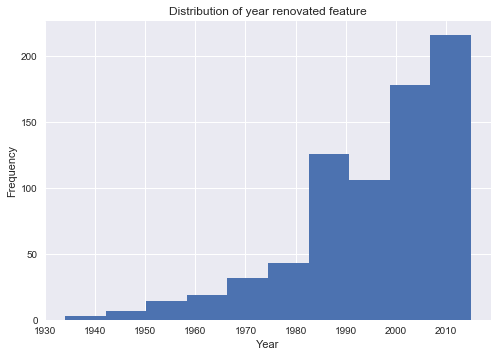

In [71]:
# Visualise yr_renovated post 1900 (to not show all the 0 values)
df[df['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

We will choose to only consider renovations which took place from 1990 onwards, on the basis that earlier renovations are likely to be obsolete. Let us create a new feature `was_renovated_post90` which has value `1` if the house was renovated post 1990 and `0` otherwise.

In [72]:
# Define binary column was_renovated
df['was_renovated_post90'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)

Let us now consider the year the house was built.

In [73]:
# Get summary statistics for yr_built
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

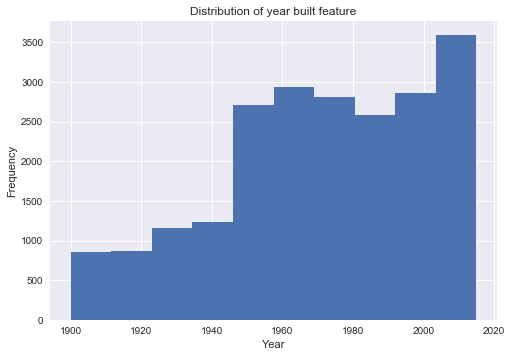

In [74]:
# Visualise yr_built distribution
df['yr_built'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of year built feature')
plt.show()

We are going to define bins as the `yr_built` feature should be treated as a categorical variable.

In [75]:
# Define bins based on statistics
yr_built_bins = [1900, 1950, 1975, 1997, 2015]

# Map to bins using pd.cut()
df['yr_built'] = pd.cut(df['yr_built'], yr_built_bins)

As we saw that `sqft_basement` had mostly 0 values, indicating no basement, let us create a new feature `has_basement` which has value `1` if the house has a basement and `0` otherwise.

In [76]:
# Define binary column has_basement
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

In [110]:
# Drop original basement column
df = df.drop('sqft_basement', axis = 1)

We note the existance of variables which are on a scale,  namely `condition` and `grade`. Let us explore the range and see if we need to adjust the scale to make it more intuitive.

In [77]:
# Investigate condition
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

The `condition` is a value between `1` and `5` with the middle value of `3` being most popular. No scaling required.

In [78]:
# Investigate grade
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

The grade is a value between 3 and 13 based on KC's grading system. However for ease of understanding we will scale to 0-10.

In [79]:
# Map grade to 0-10 by substracting 3
df['grade'] = df['grade'].map(lambda x: x-3) 

In [80]:
# Preview all changes
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_month,quarter_sold,was_renovated_post90,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,10,Q4,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,Q4,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,2,Q1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,12,Q4,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,2,Q1,0,0


### Outlier considerations

Let us conduct an initial investigation into the target variable `price` to see if we want to make any adjustments to exclude outliers.

In [86]:
# Investigate price
df['price'].describe().round(3)

count      21597.000
mean      540296.574
std       367368.140
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

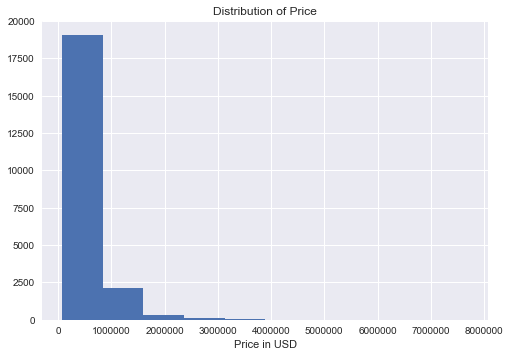

In [89]:
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

We choose to focus on the "average" home sold and will leave luxury houses at the highest price point for a separate analysis beyong the scope of this project.

In [90]:
# Look at 0.9 percentile
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


Let us remove houses with sale price above $1.6 million from our dataset. This will result in a loss of around 2% of our data but will greatly improve the quality of insights we can draw from our exploratory data analysis and our model.

In [100]:
# Choose to remove entries with price above $1.6 million.
df = df[df['price']<1600000]

In [102]:
# Get size of our dataset
len(df)

21147

## Explore data

### Initial visualisations

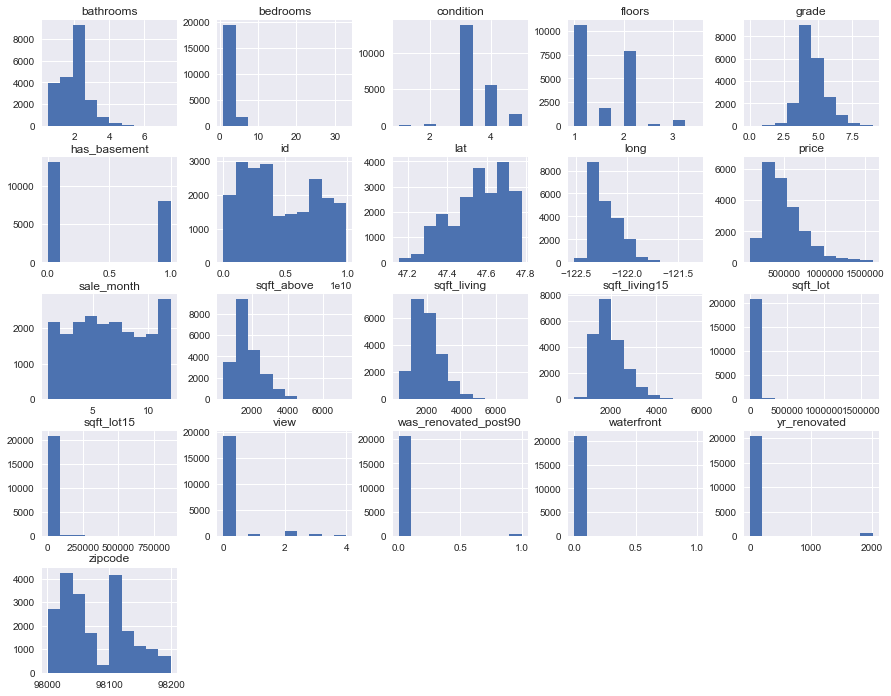

In [111]:
# Plot all distributions
df.hist(figsize = (15,12))
plt.show()

### Q1: Best time of year to sell

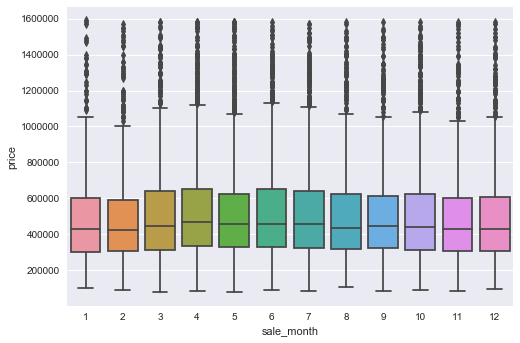

In [104]:
sns.boxplot(x = df['sale_month'], y = df['price'], data = df)
plt.show()

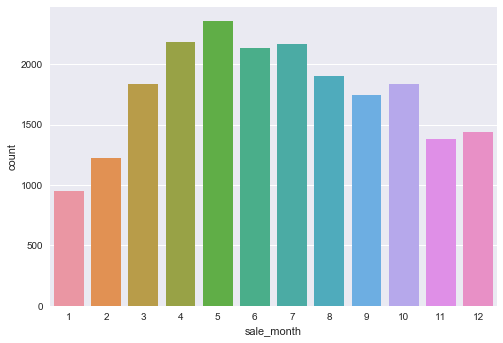

In [105]:
sns.countplot(x = df['sale_month'], data = df)
plt.show()

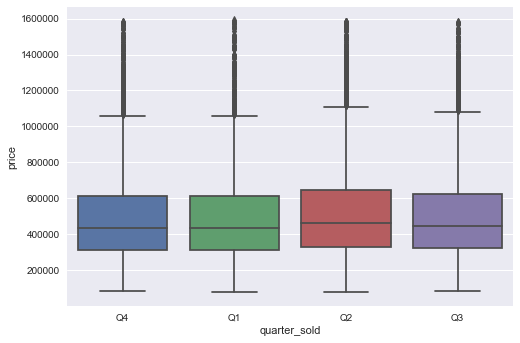

In [106]:
sns.boxplot(x = df['quarter_sold'], y = df['price'], data = df)
plt.show()

### Q2: Best location/neighbourhood

### Q3: What type of houses are most valuable

### Investigate continuous variables

We would like to investigate the relationship between our target variable `price` and the continuous feature variables in our dataset. We will make use of Seaborn's `jointplot` to simultaneously inspect linearity and distributions.

In [112]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

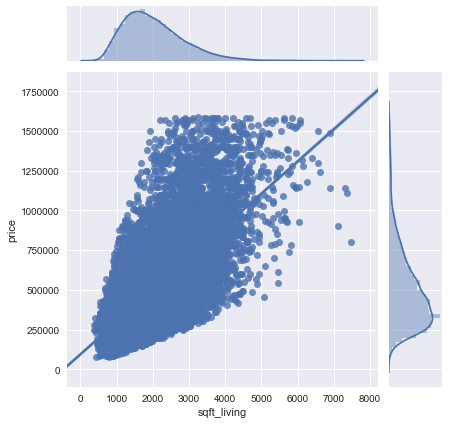

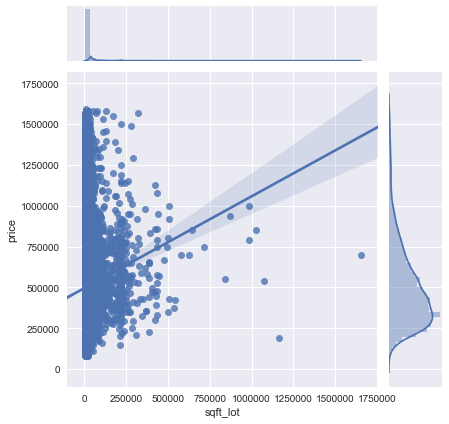

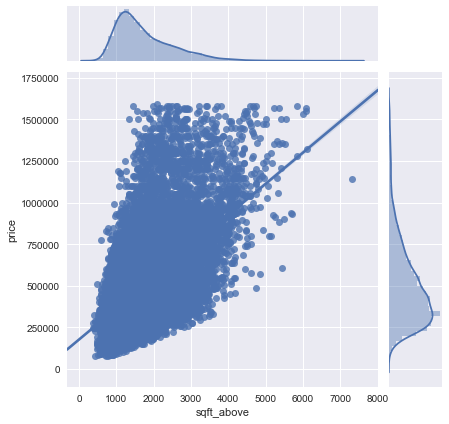

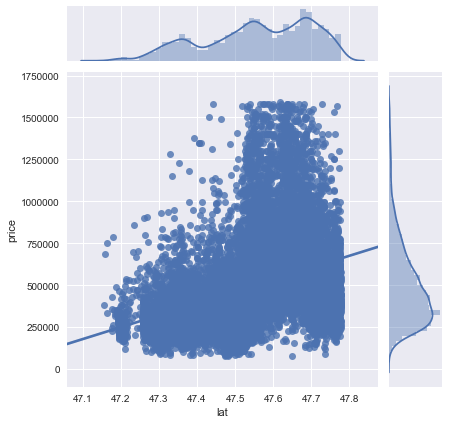

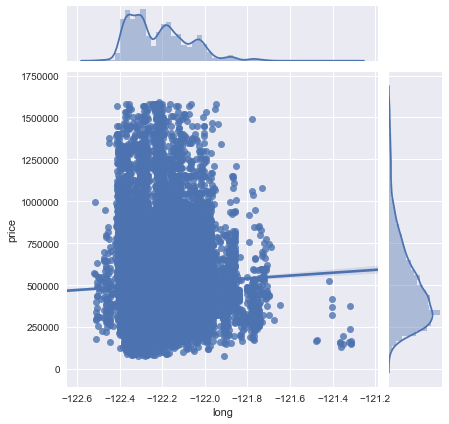

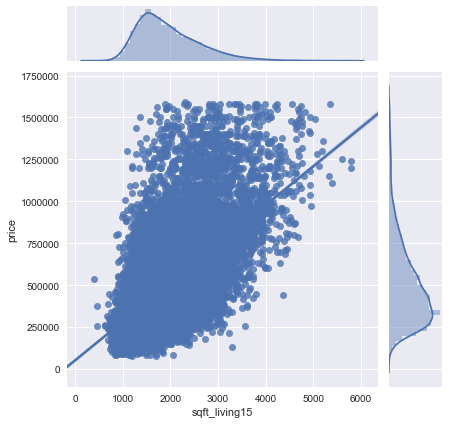

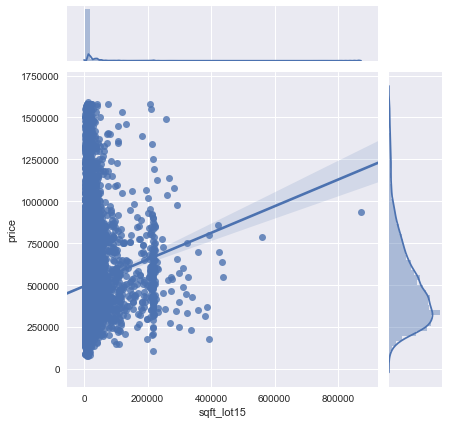

In [117]:
# Plot jointplots

for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')